# Surprise Housing Pricing Prediction

## Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Business Goal
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing Relevant Libraries

In [50]:
#importing libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from IPython.display import display
from statsmodels.tools.eval_measures import rmse
import warnings

#set options
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None,'display.max_rows',500, 'display.max_colwidth', 1500, 'display.float_format',  '{:,.2f}'.format)

### Reading data from source file

In [51]:
# Load data 
housing_df = pd.read_csv('train.csv')
print("Housing Data Shape :",housing_df.shape)
housing_df.head(5)

Housing Data Shape : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Exploratory Data Analysis

#### Data Cleaning - Missing, Empty Columns, Outlier Treatments etc.

In [52]:
# Find count columns with null values
print("Percentage Null Values per Column\n", round((100*housing_df.isnull().sum().sort_values(ascending=False))/len(housing_df.index)))

Percentage Null Values per Column
 PoolQC          100.00
MiscFeature      96.00
Alley            94.00
Fence            81.00
FireplaceQu      47.00
LotFrontage      18.00
GarageYrBlt       6.00
GarageCond        6.00
GarageType        6.00
GarageFinish      6.00
GarageQual        6.00
BsmtFinType2      3.00
BsmtExposure      3.00
BsmtQual          3.00
BsmtCond          3.00
BsmtFinType1      3.00
MasVnrArea        1.00
MasVnrType        1.00
Electrical        0.00
Id                0.00
Functional        0.00
Fireplaces        0.00
KitchenQual       0.00
KitchenAbvGr      0.00
BedroomAbvGr      0.00
HalfBath          0.00
FullBath          0.00
BsmtHalfBath      0.00
TotRmsAbvGrd      0.00
GarageCars        0.00
GrLivArea         0.00
GarageArea        0.00
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
MiscVal           0.00
MoSold            0.00
YrSold            0.00

#### While some columns (PoolQC , MiscFeatures etc) show null values, but looking at the data dictonary it is clear that the values are not null, but NA means something related to column e.g. "No alley access".  Hence no column is being dropped.

In [53]:
columns_with_NA = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType","GarageFinish", "GarageQual","GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in columns_with_NA:
    housing_df[col]=housing_df[col].fillna("NONE")

#### While we didnt drop any columns just because they had NA as values, there are some columns which have very high % of values as NA e.g. PoolQC (only 7 values which are non NA). Hence we would be dropping similar columns where NA values are more than 80%. e.g.PoolQC', 'MiscFeature', 'Alley', 'Fence' . Additionally, we will drop ID as a cloumn as it doesnt help in analysis

In [54]:
housing_df = housing_df.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

#### The column MiscVal is related to MiscFeature. It has only 52 non-zero rows. Since we have deleted MiscFeature, we are dropping the MiscVal as well


In [55]:
housing_df = housing_df.drop(['MiscVal'], axis=1)

#### Now lets check for columns with unique values

In [56]:
# check for columns with unique values
print("Unique Values per column\n", housing_df.nunique().sort_values())

Unique Values per column
 CentralAir          2
Street              2
Utilities           2
LandSlope           3
HalfBath            3
BsmtHalfBath        3
PavedDrive          3
LotShape            4
ExterQual           4
Fireplaces          4
BsmtFullBath        4
KitchenAbvGr        4
FullBath            4
MasVnrType          4
GarageFinish        4
LandContour         4
KitchenQual         4
ExterCond           5
BsmtExposure        5
GarageCars          5
HeatingQC           5
Electrical          5
BsmtQual            5
BldgType            5
LotConfig           5
YrSold              5
MSZoning            5
BsmtCond            5
FireplaceQu         6
SaleCondition       6
Heating             6
GarageQual          6
GarageCond          6
RoofStyle           6
Foundation          6
BsmtFinType1        7
BsmtFinType2        7
GarageType          7
Functional          7
Condition2          8
HouseStyle          8
BedroomAbvGr        8
PoolArea            8
RoofMatl            8
Condit

#### We see a lot of columns with only few unique values. We will analyse the proportion of those unique values for each of these columns 

In [57]:
housing_subset_df = housing_df.loc[:, housing_df.nunique() < 10]
housing_subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Condition1     1460 non-null   object
 8   Condition2     1460 non-null   object
 9   BldgType       1460 non-null   object
 10  HouseStyle     1460 non-null   object
 11  OverallCond    1460 non-null   int64 
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  MasVnrType     1452 non-null   object
 15  ExterQual      1460 non-null   object
 16  ExterCond      1460 non-null   object
 17  Foundation     1460 non-null   object
 18  BsmtQual       1460 non-null

In [58]:
for i in housing_subset_df.columns:
    print(housing_subset_df[i].value_counts(normalize=True) * 100)
    print('\n')

RL        78.84
RM        14.93
FV         4.45
RH         1.10
C (all)    0.68
Name: MSZoning, dtype: float64


Pave   99.59
Grvl    0.41
Name: Street, dtype: float64


Reg   63.36
IR1   33.15
IR2    2.81
IR3    0.68
Name: LotShape, dtype: float64


Lvl   89.79
Bnk    4.32
HLS    3.42
Low    2.47
Name: LandContour, dtype: float64


AllPub   99.93
NoSeWa    0.07
Name: Utilities, dtype: float64


Inside    72.05
Corner    18.01
CulDSac    6.44
FR2        3.22
FR3        0.27
Name: LotConfig, dtype: float64


Gtl   94.66
Mod    4.45
Sev    0.89
Name: LandSlope, dtype: float64


Norm     86.30
Feedr     5.55
Artery    3.29
RRAn      1.78
PosN      1.30
RRAe      0.75
PosA      0.55
RRNn      0.34
RRNe      0.14
Name: Condition1, dtype: float64


Norm     98.97
Feedr     0.41
Artery    0.14
RRNn      0.14
PosN      0.14
PosA      0.07
RRAn      0.07
RRAe      0.07
Name: Condition2, dtype: float64


1Fam     83.56
TwnhsE    7.81
Duplex    3.56
Twnhs     2.95
2fmCon    2.12
Name: BldgType, d

#### the following columns have disproportionately high number of only 1 value. e.g. Column "Street" has 99.59% as "Pave" as the value. Hence such columns will not add any value in the model building. So we are dropping all columns where any one unique value is present for more than 90% of the cases. :
(MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Condition2, RoofMatl, BsmtCond, Heating, CentralAir, Electrical, BsmtHalfBath, KitchenAbvGr, Functional, GarageQual, GarageCond, PavedDrive, PoolArea) 

In [59]:
housing_df = housing_df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea'], axis=1)

In [60]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Neighborhood   1460 non-null   object 
 4   Condition1     1460 non-null   object 
 5   BldgType       1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1452 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

#### Now lets remove duplicate rows from the data set

In [61]:
housing_df.drop_duplicates(keep=False,inplace=True)

In [62]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Neighborhood   1460 non-null   object 
 4   Condition1     1460 non-null   object 
 5   BldgType       1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1452 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

#### Since there were no changes in the number of entries in the data set, it means that there were no duplicates

#### Now checking for numerical and categorical features

In [63]:
categorical = []
numerical = []
for i in housing_df.columns:
    if housing_df[i].dtypes != 'O':
        numerical.append(i)
    else:
        categorical.append(i)

print("Numerical columns are-->", len(numerical))
print("Categorical columns are-->", len(categorical))

Numerical columns are--> 33
Categorical columns are--> 22


#### Some of the numerical columns will still be categorical. We will analyse the data dictionary and convert the numerical columns into categorical column

#### Lets analyse the numerical columns first, before moving on to categorical columns

In [64]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,2,1,3,8,0,"2,003.00",2,548,0,61,0,0,0,2,2008,208500
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,2,0,3,6,1,"1,976.00",2,460,298,0,0,0,0,5,2007,181500
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,2,1,3,6,1,"2,001.00",2,608,0,42,0,0,0,9,2008,223500
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,1,0,3,7,1,"1,998.00",3,642,0,35,272,0,0,2,2006,140000
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,2,1,4,9,1,"2,000.00",3,836,192,84,0,0,0,12,2008,250000


#### The following columns are numerical in the data set but are actually categorical: 
MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold

#### These will be converted to categorical as well. For now, dropping them before we do the correlation on the numerical columns

In [65]:
housing_numeric = housing_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'], axis=1)


In [66]:
# correlation matrix
cor = housing_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
LotFrontage,1.00,0.43,0.19,0.23,0.05,0.13,0.39,0.46,0.08,0.04,0.40,0.10,0.20,0.05,0.26,0.35,0.27,0.29,0.34,0.09,0.15,0.01,0.07,0.04,0.35
LotArea,0.43,1.00,0.10,0.21,0.11,-0.00,0.26,0.30,0.05,0.00,0.26,0.16,0.13,0.01,0.12,0.19,0.27,0.15,0.18,0.17,0.08,-0.02,0.02,0.04,0.26
MasVnrArea,0.19,0.10,1.00,0.26,-0.07,0.11,0.36,0.34,0.17,-0.07,0.39,0.09,0.28,0.20,0.10,0.28,0.25,0.36,0.37,0.16,0.13,-0.11,0.02,0.06,0.48
BsmtFinSF1,0.23,0.21,0.26,1.00,-0.05,-0.50,0.52,0.45,-0.14,-0.06,0.21,0.65,0.06,0.00,-0.11,0.04,0.26,0.22,0.30,0.20,0.11,-0.10,0.03,0.06,0.39
BsmtFinSF2,0.05,0.11,-0.07,-0.05,1.00,-0.21,0.10,0.10,-0.10,0.01,-0.01,0.16,-0.08,-0.03,-0.02,-0.04,0.05,-0.04,-0.02,0.07,0.00,0.04,-0.03,0.09,-0.01
BsmtUnfSF,0.13,-0.00,0.11,-0.50,-0.21,1.00,0.42,0.32,0.00,0.03,0.24,-0.42,0.29,-0.04,0.17,0.25,0.05,0.21,0.18,-0.01,0.13,-0.00,0.02,-0.01,0.21
TotalBsmtSF,0.39,0.26,0.36,0.52,0.10,0.42,1.00,0.82,-0.17,-0.03,0.45,0.31,0.32,-0.05,0.05,0.29,0.34,0.43,0.49,0.23,0.25,-0.10,0.04,0.08,0.61
1stFlrSF,0.46,0.30,0.34,0.45,0.10,0.32,0.82,1.00,-0.20,-0.01,0.57,0.24,0.38,-0.12,0.13,0.41,0.41,0.44,0.49,0.24,0.21,-0.07,0.06,0.09,0.61
2ndFlrSF,0.08,0.05,0.17,-0.14,-0.10,0.00,-0.17,-0.20,1.00,0.06,0.69,-0.17,0.42,0.61,0.50,0.62,0.19,0.18,0.14,0.09,0.21,0.06,-0.02,0.04,0.32
LowQualFinSF,0.04,0.00,-0.07,-0.06,0.01,0.03,-0.03,-0.01,0.06,1.00,0.13,-0.05,-0.00,-0.03,0.11,0.13,-0.02,-0.09,-0.07,-0.03,0.02,0.06,-0.00,0.03,-0.03


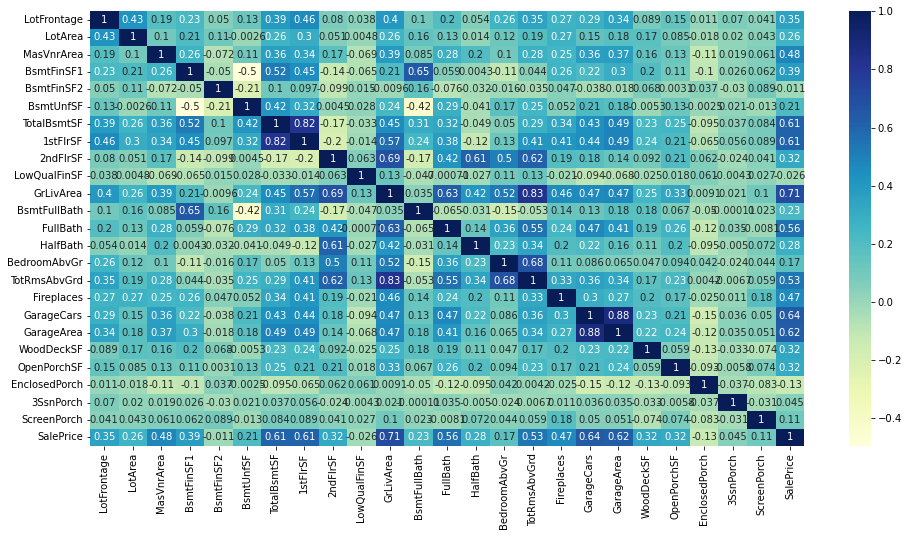

In [67]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### The heatmap shows some useful insights:

#### Correlation of SalePrice with independent variables:
    SalePrice is highly (positively) correlated with TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars and GarageArea.
    SalePrice is negatively correlated to EnclosedPorch, LowQualFinSF and BsmtFinSF2.

#### Correlation among independent variables:
    Many independent variables are highly correlated: 1stFlrSF, TotalBsmtSF, GrLivArea, 2ndFlrSF, FullBath, TotRmsAbvGrd, GrLivArea, BedroomAbvGr, GarageArea, GarageCars.

#### Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

##### As we observed earlier, the following columns are numerical in the data set but are actually categorical:
MSSubClass, OverallQual, OverallCond, YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold

##### Hence converting them to object type.

In [68]:
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype('object')

In [69]:
housing_df['OverallQual'] = housing_df['OverallQual'].astype('object')
housing_df['OverallCond'] = housing_df['OverallCond'].astype('object')
housing_df['YearBuilt'] = housing_df['YearBuilt'].astype('object')
housing_df['YearRemodAdd'] = housing_df['YearRemodAdd'].astype('object')
housing_df['GarageYrBlt'] = housing_df['GarageYrBlt'].astype('object')
housing_df['MoSold'] = housing_df['MoSold'].astype('object')
housing_df['YrSold'] = housing_df['YrSold'].astype('object')

In [70]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Neighborhood   1460 non-null   object 
 4   Condition1     1460 non-null   object 
 5   BldgType       1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   object 
 8   OverallCond    1460 non-null   object 
 9   YearBuilt      1460 non-null   object 
 10  YearRemodAdd   1460 non-null   object 
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1452 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

#### After visualizing the numerical variables, lets visualize the categorical variables as well using box plot

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

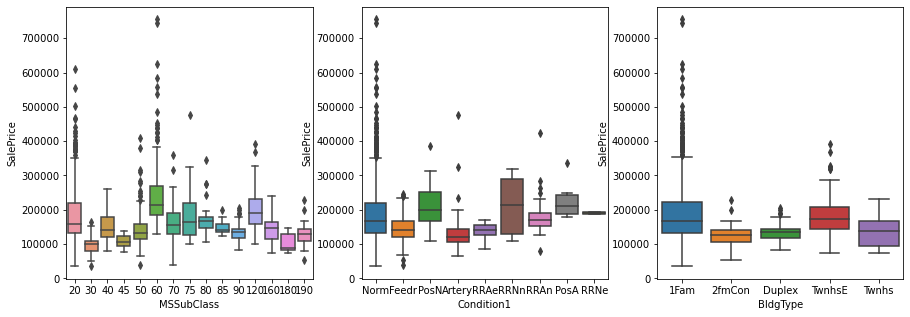

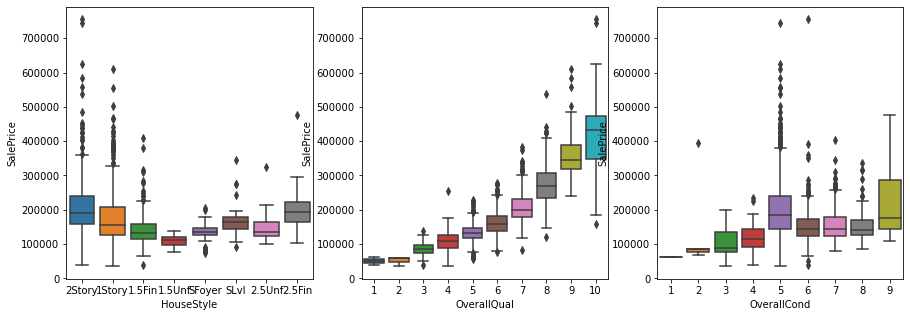

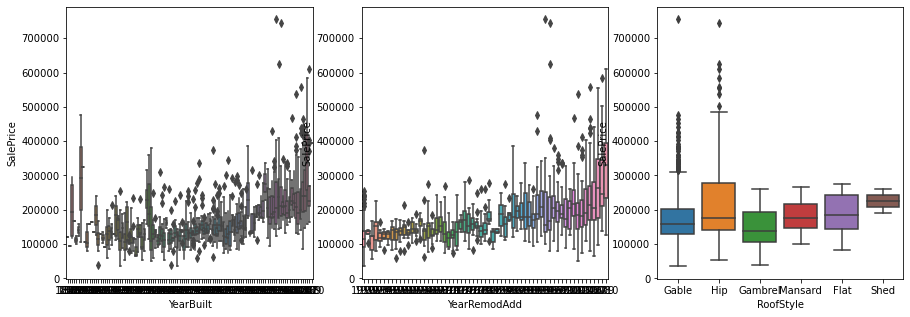

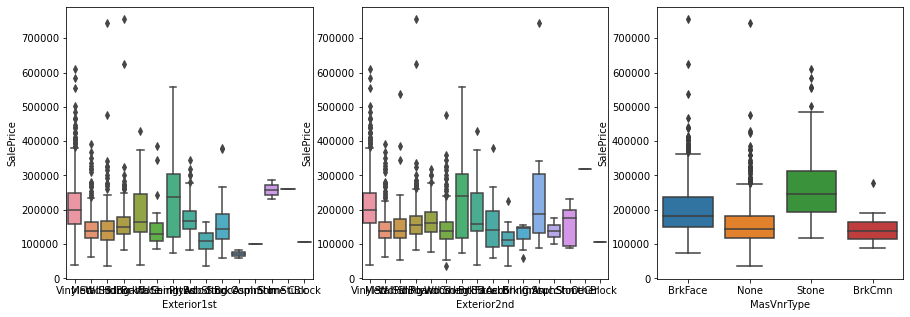

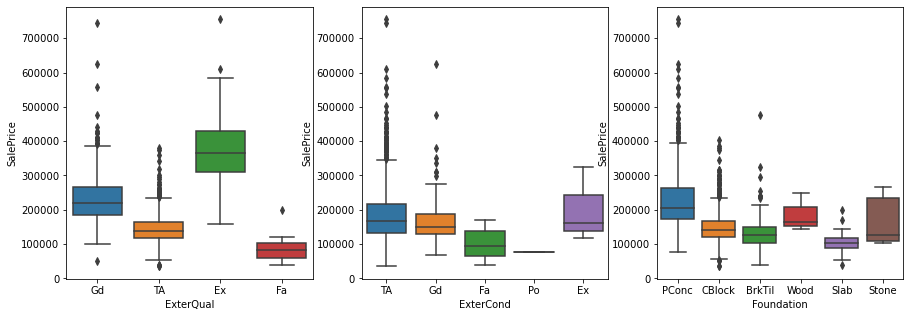

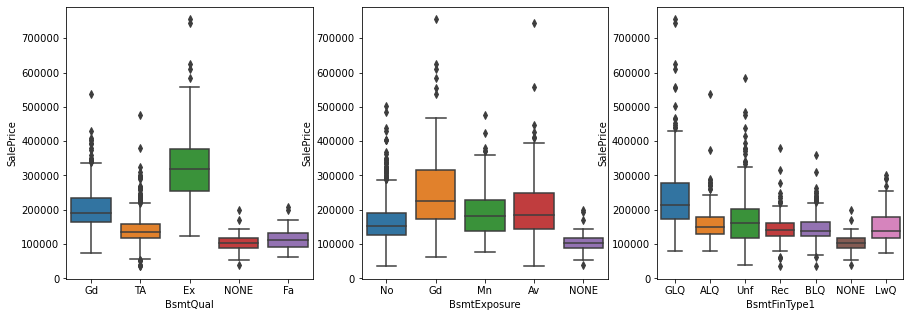

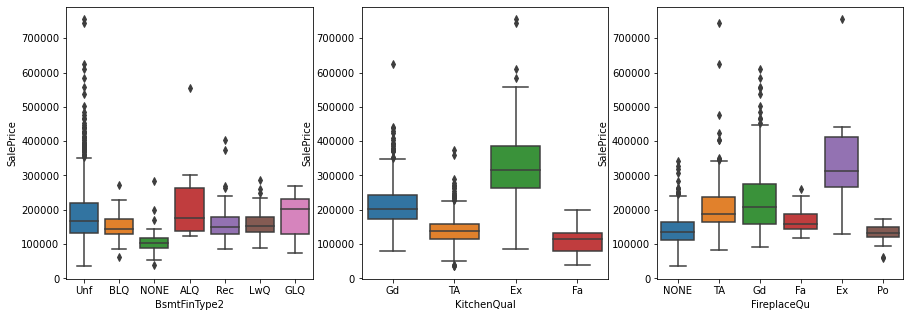

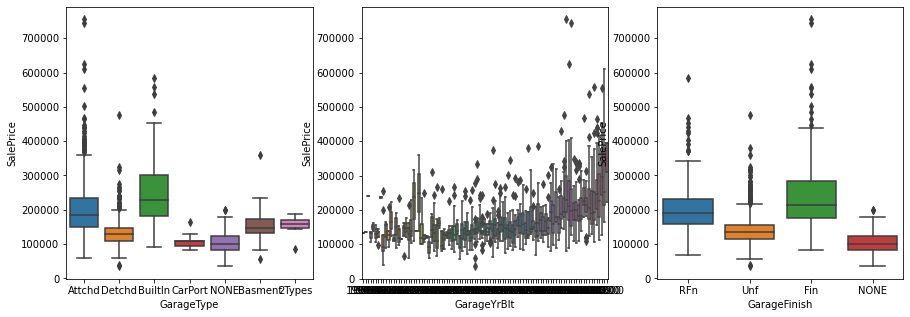

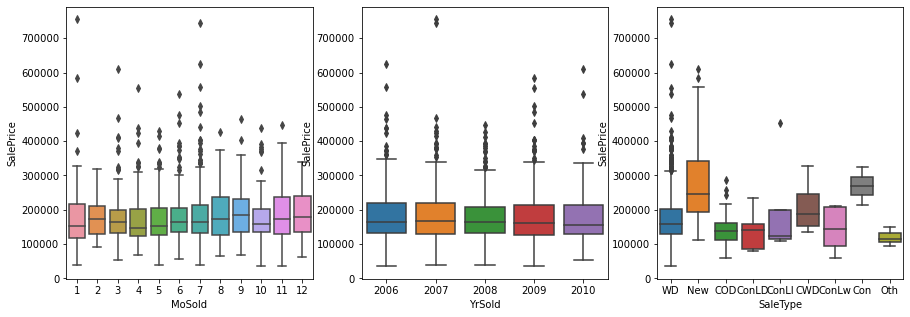

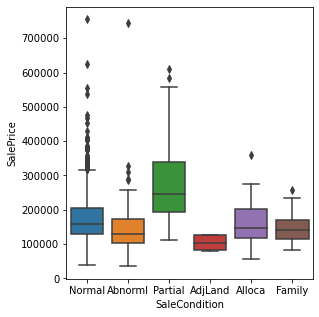

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="MSSubClass", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="Condition1", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="BldgType", y="SalePrice", data=housing_df)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="OverallQual", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="OverallCond", y="SalePrice", data=housing_df)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="YearBuilt", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="YearRemodAdd", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="RoofStyle", y="SalePrice", data=housing_df)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="Exterior1st", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="Exterior2nd", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="MasVnrType", y="SalePrice", data=housing_df)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="ExterQual", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="ExterCond", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="Foundation", y="SalePrice", data=housing_df)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=housing_df)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="KitchenQual", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=housing_df)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="GarageType", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="GarageFinish", y="SalePrice", data=housing_df)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="MoSold", y="SalePrice", data=housing_df)

plt.subplot(1,3,2)
sns.boxplot(x="YrSold", y="SalePrice", data=housing_df)

plt.subplot(1,3,3)
sns.boxplot(x="SaleType", y="SalePrice", data=housing_df)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x="SaleCondition", y="SalePrice", data=housing_df)


#### The boxplots on categorical columns shows some useful insights:
- price seems to be hightest for type of dwelling (2-STORY 1946 & NEWER)
- price seems to be hightest for proximity to Within 200' of North-South Railroad
- Single-family Detached or Townhouse End Unit get the best price
- OverallQual should be very excellent for best prices
- Interestingly enough, price is best where overall condition is either "average" or "excellent"
- on an average, houses with shed get higher price
- Masonry veneer type - Stone get the best price
- Excellent quality of the material on the exterior gets the best price
- Foundation made of Poured Contrete gets the best price
- height of the basement Excellent (100+ inches) gets best price
- Kitchen quality excellent gets best price
- Fireplace quality excellent gets best price
- Contract 15% Down payment regular terms or Home just constructed and sold get best price
- Home was not completed when last assessed (associated with New Homes) also get the best price


##### Lets look at SalePrice for any skewness

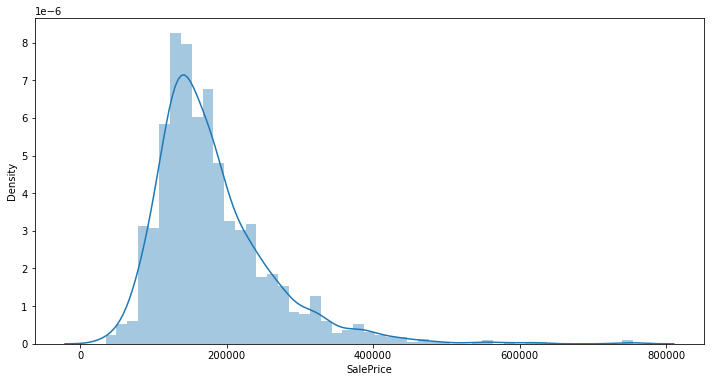

Checking the Skewness of Sale Price: 1.8828757597682129


In [72]:
plt.figure(figsize=(12,6))
sns.distplot(housing_df['SalePrice'])
plt.show()
print("Checking the Skewness of Sale Price:", housing_df.SalePrice.skew())

Sale Price is right-skewed as observed above.
Applying the best practice of removing Skewness by applying log transformation

Checking the Skewness again of Sale Price: 0.12133506220520406


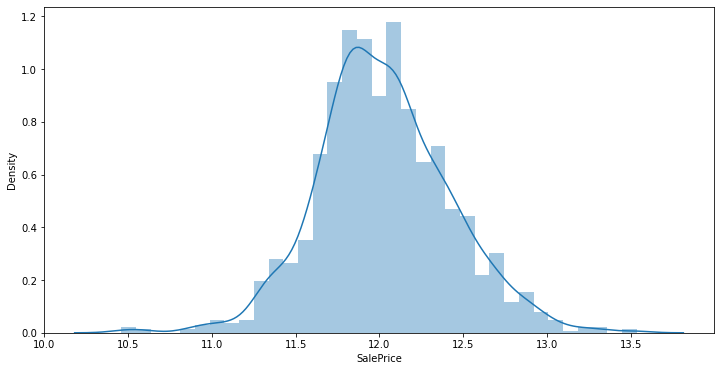

In [73]:
housing_df['SalePrice'] = np.log(housing_df['SalePrice'])
print("Checking the Skewness again of Sale Price:", housing_df.SalePrice.skew())

plt.figure(figsize=(12,6))
sns.distplot(housing_df['SalePrice'])
plt.show()

#### Now lets create dummies for categorical variables

In [74]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Neighborhood   1460 non-null   object 
 4   Condition1     1460 non-null   object 
 5   BldgType       1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   object 
 8   OverallCond    1460 non-null   object 
 9   YearBuilt      1460 non-null   object 
 10  YearRemodAdd   1460 non-null   object 
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1452 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

In [75]:
categorical_cols = housing_df.select_dtypes(include=['object']).columns
numerical_cols = housing_df.select_dtypes(include=['int64', 'float64']).columns

In [76]:
print(categorical_cols)


Index(['MSSubClass', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [77]:
print(numerical_cols)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'SalePrice'],
      dtype='object')


#### Creating Dummies

In [78]:
housing_df = pd.get_dummies(data = housing_df, columns = categorical_cols,drop_first=True)

In [79]:
housing_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemodAdd_1991,YearRemodAdd_1992,YearRemodAdd_1993,YearRemodAdd_1994,YearRemodAdd_1995

In [80]:
X = housing_df.drop('SalePrice',axis=1)
Y = housing_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    train_size=0.7, random_state=25)

In [81]:
numerical_cols = numerical_cols.drop('SalePrice')

### Model Building

In [82]:
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

#### Linear Regression Model

In [83]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((1021, 483), (439, 483), (1021,), (439,))

In [84]:
X_train = np.nan_to_num(X_train)


In [85]:
y_train = np.nan_to_num(y_train)

In [86]:
X_train.shape

(1021, 483)

In [87]:
y_train.shape

(1021,)

In [88]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)

In [89]:
print(lr.intercept_)
print(lr.coef_)

10.780497035574577
[-1.84210743e-01  3.69525568e-01  5.18026993e-02 -3.35796502e+10
 -8.76973855e+09 -1.38983102e+10  3.63521727e+10  5.41464806e+10
  2.31401744e+10  7.28062691e+09 -6.62384309e+10  1.79394245e-01
  2.49907851e-01  1.26338005e-01  3.91771495e-02  6.52887821e-02
  5.01403809e-02  2.24684954e-01 -1.05572939e-02  1.05987549e-01
 -4.46247458e-02  7.88679123e-02  2.06849575e-01  1.07492447e-01
 -8.04452896e-02 -1.95216089e-02 -1.49469614e-01  6.00175858e-02
 -6.30836487e-02 -2.26225853e-02  1.43456936e-01 -8.28390121e-02
  1.24132633e-03  1.32639354e+10 -7.19451904e-02 -1.69437408e-01
 -1.04864120e-01 -1.28257362e+10 -1.20885611e-01 -3.49130630e-02
 -5.67880869e-02  3.49717140e-02 -4.02927399e-02  4.61421013e-02
 -1.33421898e-01 -8.87179375e-02 -1.39475584e-01 -1.93990350e-01
 -3.60460281e-02 -9.96751785e-02  5.23345470e-02 -7.75623322e-02
  5.21695018e-02  8.19522142e-02 -1.02551460e-01 -1.22204185e-01
 -6.94761276e-02 -3.44324112e-03  2.61192322e-02  1.59169197e-01
 -3.62

In [90]:
X_test = np.nan_to_num(X_test)

y_pred_test = lr.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9499031928052538
-4.709671552302576e+20
7.863678663085107
3.568450074698617e+22
0.007701937965803239
8.128587869472932e+19


##### Ridge and Lasso Regression
Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [91]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [93]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = 6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-5.51697454e-02  9.48758773e-02  3.15100624e-02  2.40696748e-02
  4.55974562e-02  7.90175781e-02  6.34443465e-02  1.33867005e-01
  1.01648903e-01  2.13792463e-02  1.47289945e-01  1.24968802e-01
  1.87809457e-01  1.06449341e-01  6.13711003e-02  1.29906147e-01
  5.35717965e-02  1.44937069e-01  9.95168992e-02  1.01275037e-01
  6.57599617e-03  3.62947869e-02  4.15420573e-02  9.68481510e-02
 -1.21439892e-01  8.72313921e-03 -3.43749127e-02  4.95545650e-05
 -1.17842583e-02  2.78329623e-02  4.41548026e-02 -9.31300021e-03
  2.02778488e-02  5.28392165e-03 -3.65996328e-02 -7.61999199e-02
 -3.48836931e-02 -1.56598366e-02 -1.95899434e-02 -1.93992303e-02
 -4.95101859e-03  6.50016381e-02 -1.59260145e-02  1.06277887e-01
 -6.81430376e-02 -3.28172175e-02 -1.14492310e-01 -1.18125819e-01
 -2.45757766e-03 -4.31791450e-02  2.31623658e-02 -2.39917937e-02
  6.32952731e-02  9.51734738e-02 -7.51713475e-02 -4.87661164e-02
 -1.63770664e-02  9.42679295e-03  4.29328420e-02  1.32254941e-01
  1.39894695e-02  6.11558

In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9250160360569012
0.8515545590633617
11.770207131977225
11.247496538055483
0.011528116681662317
0.025620721043406566


##### Lasso

In [95]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [96]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [97]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [98]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.77002333e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.61407923e-01,  1.40194929e-01,
        1.98218482e-01,  1.00864600e-01,  0.00000000e+00,  1.03609107e-01,
        0.00000000e+00,  2.08675155e-01,  8.56412968e-02,  8.53804658e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.23717922e-02,
       -1.39199089e-01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.56094695e-02,
       -0.00000000e+00, -1.29560265e-04, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.84426373e-02, -0.00000000e+00,  1.14900742e-01,
       -5.42325527e-02, -0.00000000e+00, -9.82660774e-02, -1.01357501e-01,
        0.00000000e+00, -1.05970896e-02,  0.00000000e+00, -0.00000000e+00,
        4.58922402e-02,  

In [99]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

0.8978116229402915
0.8607229801596398
16.04047453914387
10.552818521073883
0.015710552927662946


In [100]:
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.024038310981945064


In [101]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.95,0.93,0.90
1,R2 Score (Test),"-470,967,155,230,257,577,984.00",0.85,0.86
2,RSS (Train),7.86,11.77,16.04
3,RSS (Test),"35,684,500,746,986,168,778,752.00",11.25,10.55
4,MSE (Train),0.09,0.11,0.13
5,MSE (Test),"9,015,868,160.90",0.16,0.16
